In [1]:
# only when using google colab to run the code
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Data Wrangling**  
    1.1.   Data Collection  
    1.2.   Data Cleaning    
           1.2.1. Detecting Missing Values  
           1.2.2. Dealing With Missing Values  
    1.2.3. Dealing With Data Types                                      
    1.3.   Summary Statistics for dataset

**Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
path = "/content/drive/MyDrive/Spotify-Project/Spotify-data-indepth-analysis/spotify-2023.csv"
df = pd.read_csv(path, encoding='latin1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
# Listing the columns of the DataFrame
columns = df.columns.tolist()
print("\nColumns in the DataFrame:", columns)


Columns in the DataFrame: ['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']


**Data Cleaning**

**1.2.1 Detecting Missing Values**

In [5]:
# Checking for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


**Column: "key"**

**Analysis:** This attribute signifies the musical key in which the song is composed. Assigning mean, median, or mode might be inappropriate and potentially misleading unless the missing values occur randomly without a discernable pattern.

**Our Strategy:** Given the nature of the 'key' attribute and considering its importance in our analysis, we have decided to remove the rows with missing key values to maintain the integrity and quality of our dataset. This approach ensures that we're working with complete data for each song in our subsequent analyses.

In [6]:
# Remove the rows with missing 'key' values
df = df.dropna(subset=['key'])

# Verify if the rows with missing values have been removed
print("Missing values after removal:", df['key'].isnull().sum())

Missing values after removal: 0


**Column Name: in_shazam_charts:**

**Analysis:** Since this represents a ranking on the Shazam charts, missing values likely indicate that the song didn't achieve a rank.

**Our Strategy:** We opted to handle the missing data in two ways:

Essentially, this strategy is about handling situations where a song didn't receive a ranking. This is important because some analyses or machine learning algorithms require numerical input, and missing data can cause issues.

1. The first step creates a column where missing values are replaced with a clear label ("Not Ranked") to make it easy for people to understand the data at a glance.

2. The second step involves creating a separate column where missing values are replaced with a numerical value that's higher than any actual rank in the dataset. This ensures that the models can process the data without any problems, while still recognizing that these songs didn't receive a rank.

Overall, this approach allows for flexibility in how the data is used for different purposes, whether for manual inspection or for feeding into machine learning algorithms.

This dual approach retains the integrity of the original data while making it usable for various analytical purposes.

In [7]:
# Create a copy for human-readable data
df['in_shazam_charts_readable'] = df['in_shazam_charts']

# Remove commas from the original column and convert to float
df['in_shazam_charts'] = df['in_shazam_charts'].replace({',': ''}, regex=True).astype(float)

# Create another copy
df['in_shazam_charts_new'] = df['in_shazam_charts'].copy()

# Find the max rank
max_rank = df['in_shazam_charts_new'].max()

# In the 'readable' version, replace NaN with "Not Ranked"
df['in_shazam_charts_readable'].fillna("Not Ranked", inplace=True)

# In the 'forML' version, replace NaN with max_rank + 1
df['in_shazam_charts_new'].fillna(max_rank + 1, inplace=True)

# Drop the original 'in_shazam_charts' column
df.drop('in_shazam_charts', axis=1, inplace=True)

df['in_shazam_charts_new'] = df['in_shazam_charts_new'].astype(int)

**1.2.3 Dealing With DataTypes**

In [8]:
# Inspect current data types
print("Original Data Types:")
print(df.dtypes)

Original Data Types:
track_name                   object
artist(s)_name               object
artist_count                  int64
released_year                 int64
released_month                int64
released_day                  int64
in_spotify_playlists          int64
in_spotify_charts             int64
streams                      object
in_apple_playlists            int64
in_apple_charts               int64
in_deezer_playlists          object
in_deezer_charts              int64
bpm                           int64
key                          object
mode                         object
danceability_%                int64
valence_%                     int64
energy_%                      int64
acousticness_%                int64
instrumentalness_%            int64
liveness_%                    int64
speechiness_%                 int64
in_shazam_charts_readable    object
in_shazam_charts_new          int64
dtype: object


In [9]:
# Convert 'streams', 'in_deezer_playlists' to appropriate numerical or categorical data types
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')

In [10]:
# Inspect revised data types
print("Revised Data Types:")
print(df.dtypes)

Revised Data Types:
track_name                    object
artist(s)_name                object
artist_count                   int64
released_year                  int64
released_month                 int64
released_day                   int64
in_spotify_playlists           int64
in_spotify_charts              int64
streams                      float64
in_apple_playlists             int64
in_apple_charts                int64
in_deezer_playlists          float64
in_deezer_charts               int64
bpm                            int64
key                           object
mode                          object
danceability_%                 int64
valence_%                      int64
energy_%                       int64
acousticness_%                 int64
instrumentalness_%             int64
liveness_%                     int64
speechiness_%                  int64
in_shazam_charts_readable     object
in_shazam_charts_new           int64
dtype: object


In [11]:
print("Number of missing values in 'streams':", df['streams'].isna().sum())
print("Number of missing values in 'in_deezer_playlists':", df['in_deezer_playlists'].isna().sum())

Number of missing values in 'streams': 1
Number of missing values in 'in_deezer_playlists': 75


In [12]:
print(df[df['streams'].isna()])

                              track_name     artist(s)_name  artist_count  \
574  Love Grows (Where My Rosemary Goes)  Edison Lighthouse             1   

     released_year  released_month  released_day  in_spotify_playlists  \
574           1970               1             1                  2877   

     in_spotify_charts  streams  in_apple_playlists  ...   mode  \
574                  0      NaN                  16  ...  Major   

     danceability_%  valence_%  energy_% acousticness_% instrumentalness_%  \
574              53         75        69              7                  0   

     liveness_%  speechiness_%  in_shazam_charts_readable  \
574          17              3                          0   

     in_shazam_charts_new  
574                     0  

[1 rows x 25 columns]


In [13]:
# Remove the row with NaN value in 'streams' column
df = df.dropna(subset=['streams'])

# Verify if the row has been removed
print("Number of missing values in 'streams':", df['streams'].isna().sum())

Number of missing values in 'streams': 0


In [14]:
print(df[df['in_deezer_playlists'].isna()].head())

         track_name         artist(s)_name  artist_count  released_year  \
48          Starboy  The Weeknd, Daft Punk             2           2016   
54     Another Love              Tom Odell             1           2012   
55  Blinding Lights             The Weeknd             1           2019   
65           Yellow          Chris Molitor             1           1999   
73  Sweater Weather      The Neighbourhood             1           2012   

    released_month  released_day  in_spotify_playlists  in_spotify_charts  \
48               9            21                 29536                 79   
54              10            15                 18371                 83   
55              11            29                 43899                 69   
65               1             1                 31358                 43   
73               5            14                 16413                 61   

         streams  in_apple_playlists  ...   mode  danceability_%  valence_%  \
48  2.5

In [15]:
df['in_deezer_playlists'].fillna(0, inplace=True)

In [16]:
summary_statistics = df.describe()
print(summary_statistics)

       artist_count  released_year  released_month  released_day  \
count    857.000000     857.000000      857.000000    857.000000   
mean       1.551925    2018.297550        6.031505     13.739790   
std        0.864634      10.991135        3.567138      9.287652   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      5.000000   
50%        1.000000    2022.000000        5.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            857.000000         857.000000  8.570000e+02   
mean            5204.997666          11.959160  5.133554e+08   
std             7944.032885          19.194211  5.714855e+08   
min               31.000000           0.000000  2.762000e+03   
25%              859.000000           0.000000  1.391938e+08   
50%

In [17]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_shazam_charts_readable,in_shazam_charts_new
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,Major,80,89,83,31,0,8,4,826,826
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,Major,71,61,74,7,0,10,4,382,382
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,Major,51,32,53,17,0,31,6,949,949
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,Major,55,58,72,11,0,11,15,548,548
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,Minor,65,23,80,14,63,11,6,425,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,Major,60,24,39,57,0,8,3,0,0
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,Major,42,7,24,83,1,12,6,0,0
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,Major,80,81,67,4,0,8,6,0,0
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,Major,82,67,77,8,0,12,5,0,0


# **2. Exploratory Data Analysis (EDA)**

In [18]:
# Audio Feature Comparison
fig_parallel = px.parallel_coordinates(df,
                                       dimensions=['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
                                                   'liveness_%', 'speechiness_%'],
                                       color='in_spotify_charts',
                                       title='Audio Features Comparison',
                                       color_continuous_scale='Viridis')
fig_parallel.update_layout(template='plotly_dark')
fig_parallel.show()

- Parallel coordinates plots are useful for visualizing relationships between multiple variables (audio features, in this case) simultaneously.
- Each line in the plot represents a track, and the vertical lines connecting the dimensions show how the values of these features change together.
- The color of each line represents whether the track is 'in_spotify_charts,' providing additional information about the tracks' popularity or presence in Spotify charts.
- By inspecting the plot, we can visually identify patterns, higher levels of valence, energy and danceability contribute to a track's popularity.
- Therefore songs from the genres of Pop, EDM and Hip-hop seem to garner large amount of views





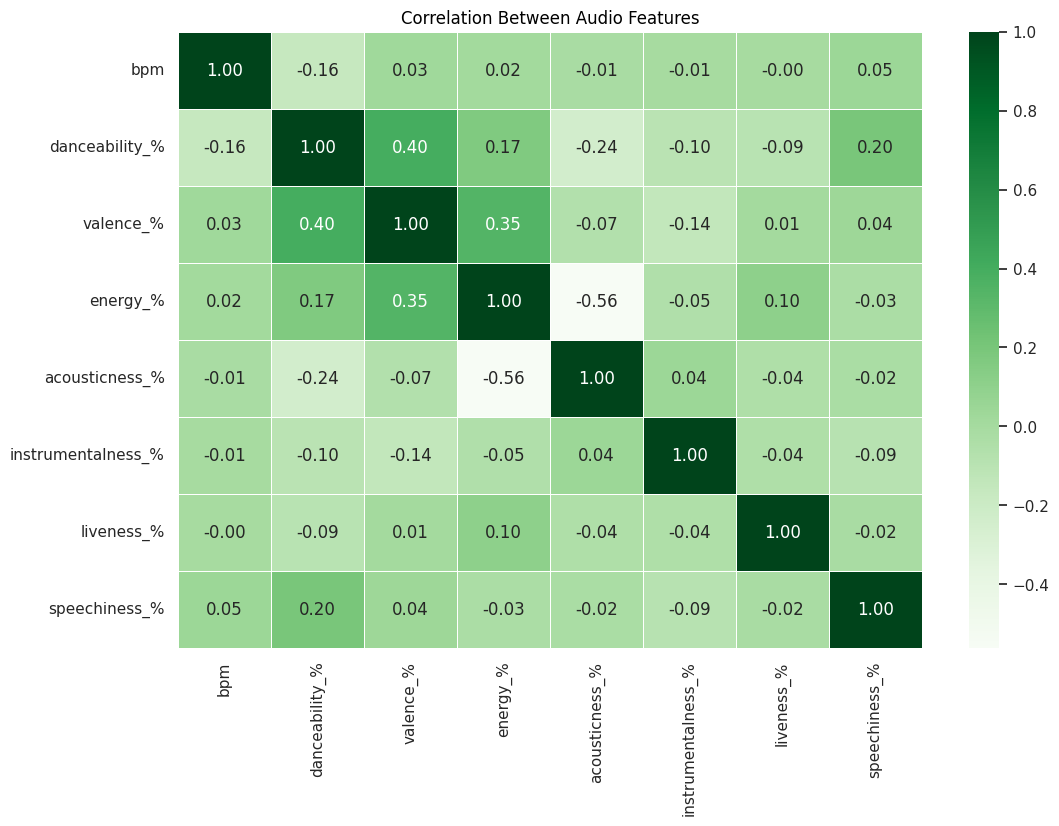

In [19]:
# Correlation Between the chosen Audio Features
audio_features = df[['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
correlation_matrix = audio_features.corr()

plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")  # Set the background style to darkgrid
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
heatmap.set_facecolor('white')  # Set the background color to black

plt.title('Correlation Between Audio Features', color='black')  # Set title color to white
plt.show()

- The lack of high correlation between the audio features suggests that they are relatively independent of each other.
- In terms of inference, it indicates that changing one audio feature is not necessarily associated with a consistent change in another feature across the dataset.
- Each audio feature may provide unique and diverse information, making them potentially valuable for different aspects of music analysis or classification.

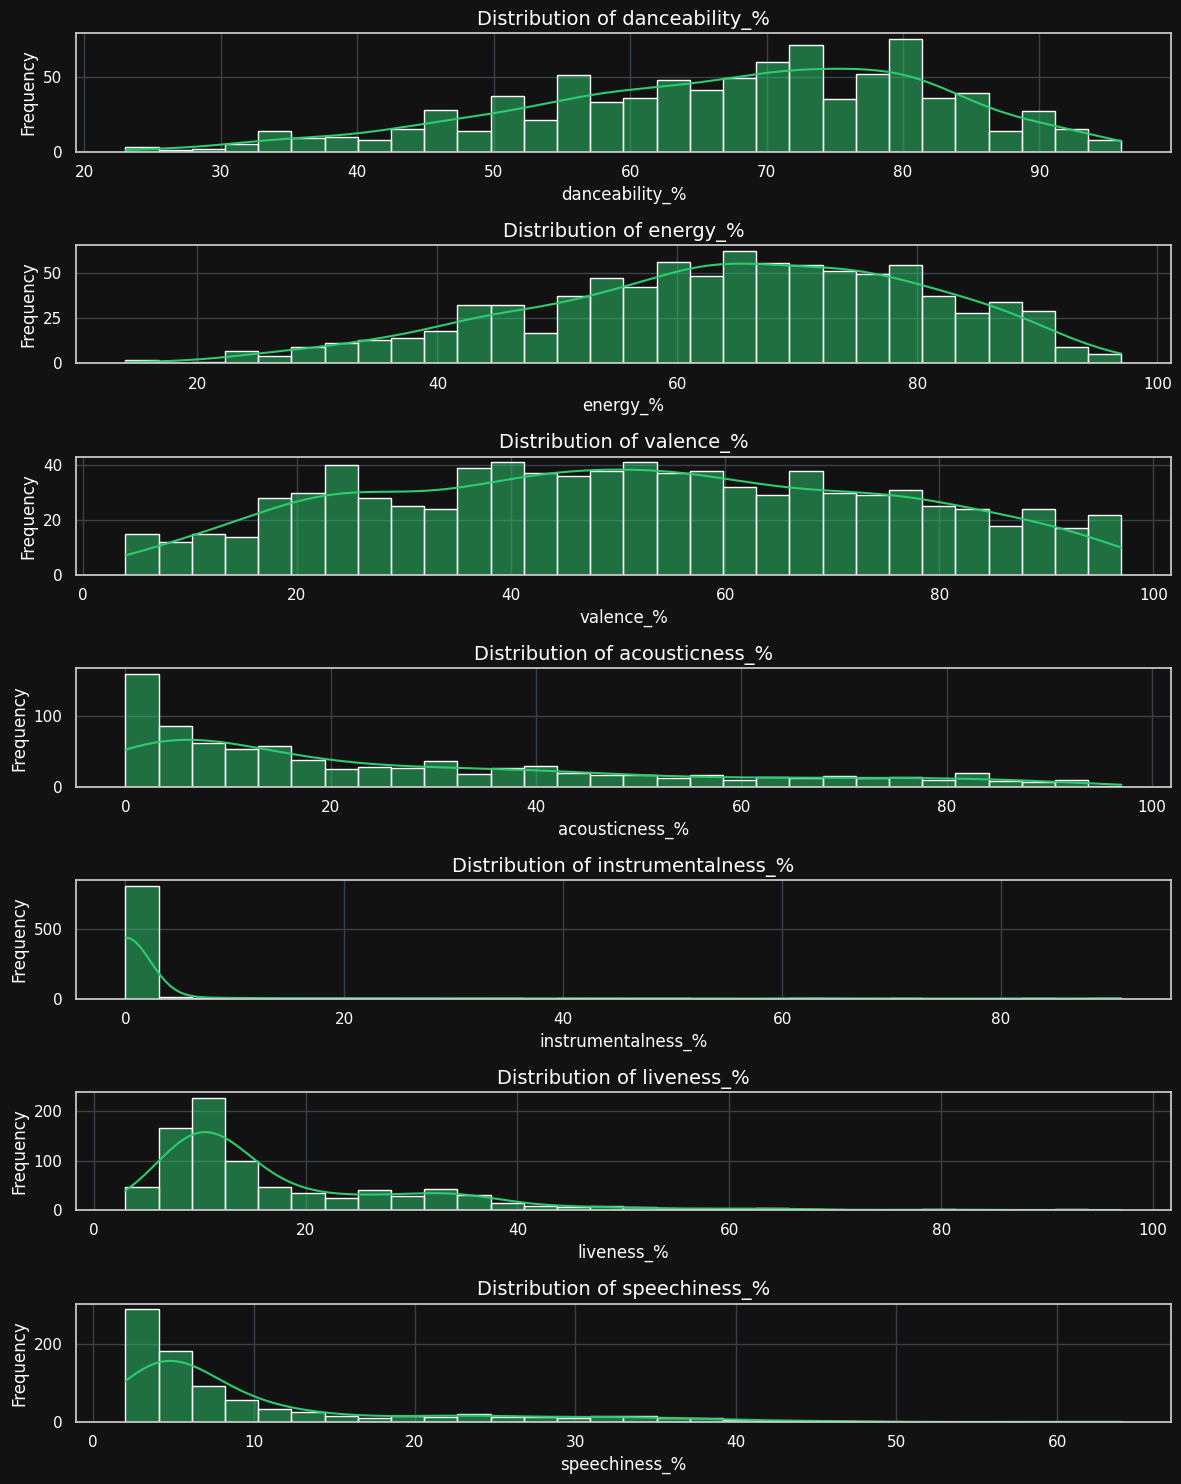

In [20]:
# Set the overall style
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#121212", "grid.color": "#384147", "text.color": "white"})

audio_features = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=len(audio_features), figsize=(12, 15))

# Plotting the distribution for each feature
for i, feature in enumerate(audio_features):
    # Set the color for bars and plot
    sns.histplot(df[feature], ax=axes[i], bins=30, kde=True, color='#2ecc71')  # Green color

    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, color='white')  # Set X-axis label color to white
    axes[i].set_ylabel('Frequency', color='white')  # Set Y-axis label color to white

    # Set the color of tick labels on both x and y axes to white
    axes[i].tick_params(axis='x', colors='white')
    axes[i].tick_params(axis='y', colors='white')

# Set the background color of the entire plot
fig.patch.set_facecolor("#121212")

plt.tight_layout()
plt.show()

In [21]:
df['key'] = pd.Categorical(df['key']).codes
df['mode'] = pd.Categorical(df['mode']).codes

# Custom shades of green color scale
custom_green_scale = ["#08280b", "#194d17", "#2b7024", "#3d9330", "#50b53c", "#62d848", "#75fb55"]

# Create a 3D scatter plot with custom green color scale
fig_3d_scatter = px.scatter_3d(df, x='energy_%', y='valence_%', z='danceability_%', color='streams',
                               size='streams', hover_name='track_name',
                               title='Energy vs. Valence vs. Danceability',
                               color_continuous_scale=custom_green_scale)
fig_3d_scatter.show()

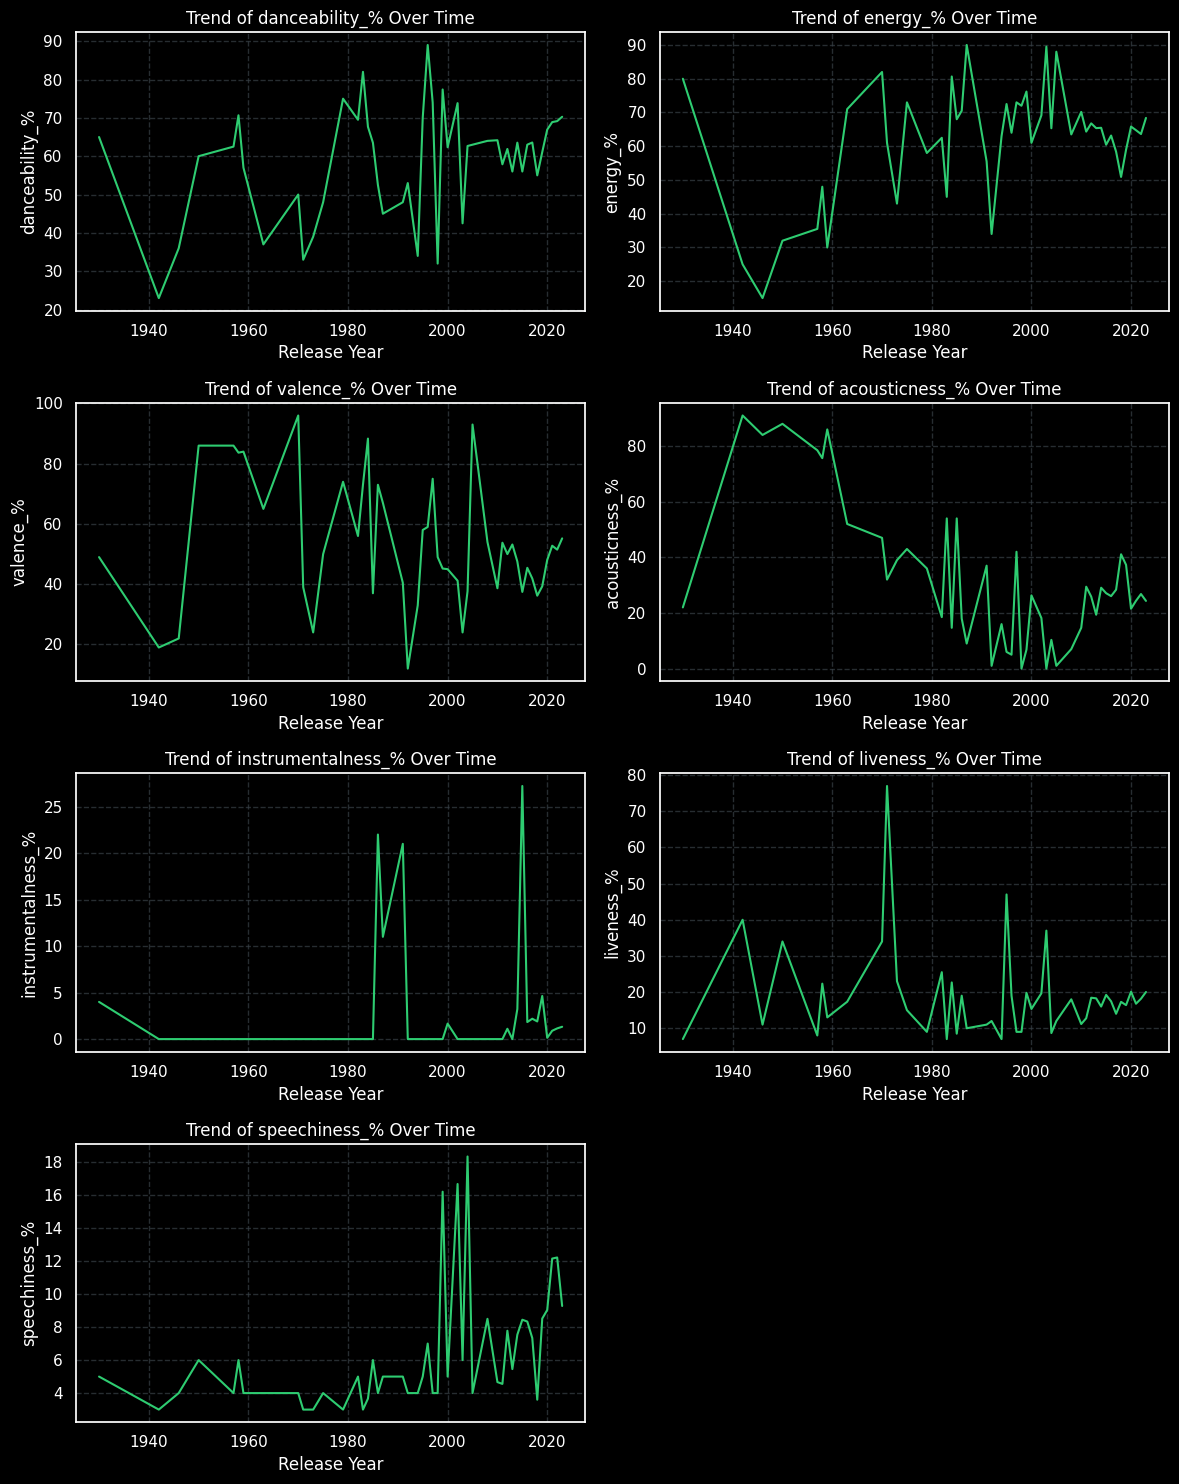

In [22]:
# Audio trends over the years
audio_features = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
audio_features_by_year = df.groupby('released_year')[audio_features].mean().reset_index()

# Set the overall style
sns.set_theme(style="darkgrid", rc={"axes.facecolor": "black", "grid.color": "#384147", "text.color": "white"})

plt.figure(figsize=(12, 15))  # Increase the figure height to fit all subplots
for i, feature in enumerate(audio_features, start=1):
    plt.subplot(4, 2, i)  # 4 rows, 2 columns of subplots
    sns.lineplot(data=audio_features_by_year, x='released_year', y=feature, color='#2ecc71')  # Green color
    plt.xlabel('Release Year', color='white')
    plt.ylabel(feature, color='white')
    plt.title(f'Trend of {feature} Over Time', color='white')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Set the color of tick labels on both x and y axes to white
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')

# Set the background color of the entire plot
plt.gcf().set_facecolor("black")

plt.tight_layout()
plt.show()



Overtime energy and danceability have shown an upward trend, however accousticness showed a downward trend.

# **2. Unsupervised Machine Learning - Clustering Songs based on Audio Features**
    2.1    Objective
    2.2    K-Means Algorithm
    2.3    Hierarchical clustering

**2.1 Objective**

Grouping songs based on their audio features to potentially identify clusters representing different music genres.

We can use the following audio features:
- bpm
- danceability_%
- valence_%
- energy_%
- acousticness_%
- instrumentalness_%
- liveness_%
- speechiness_%

**Libraries**

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

**Feature Selection**

The chosen features capture important musical characteristics like tempo, danceability, mood, intensity, acoustic elements, vocals, live performance, and spoken word content. These features are crucial for distinguishing different music genres.

In [24]:
# Selecting Audio Features
selected_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
X = df[selected_features]

In [25]:
# Normalization/Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.07656202  0.86905397  1.602177   ... -0.1881258  -0.75028502
  -0.63428181]
 [-1.09447662  0.2544933   0.41477076 ... -0.1881258  -0.60280927
  -0.63428181]
 [ 0.53788027 -1.11119709 -0.81504285 ... -0.1881258   0.94568608
  -0.43596751]
 ...
 [-1.09447662  0.86905397  1.26291807 ... -0.1881258  -0.75028502
  -0.43596751]
 [-0.91704653  1.00562301  0.66921495 ... -0.1881258  -0.45533352
  -0.53512466]
 [-1.16544866 -0.4283519  -0.81504285 ... -0.1881258  -0.5290714
  -0.53512466]]


# **2.2:  K-Means Algorithm**

The k-means algorithm is a popular unsupervised machine learning algorithm used for clustering, which is the task of grouping similar data points together. The goal of k-means is to partition a dataset into k clusters, where each data point belongs to the cluster with the nearest mean


**Principal Component Analysis (PCA)**

- Principal Component Analysis (PCA) is used to understand the influence of various audio features on song clustering.
- A scree plot is generated to visualize the cumulative explained variance, aiding in the selection of an appropriate number of components. The data is then projected into a reduced-dimensional space for subsequent K-Means clustering.
- This approach allows for a more compact representation of the songs' audio features while retaining the most important information for clustering.

In [26]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [27]:
# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.243469   0.1571676  0.13480902 0.12683459 0.11786476 0.10824483
 0.07296156 0.03864864]


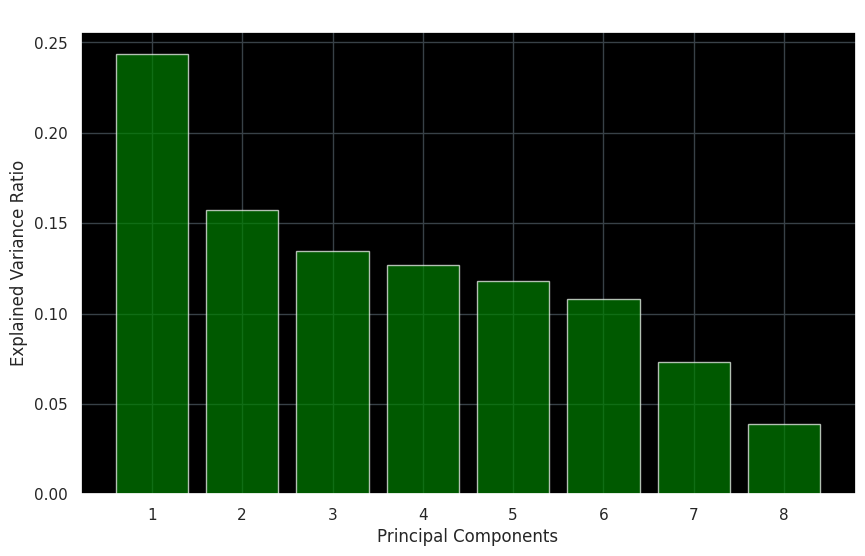

In [28]:
# Create a scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', color='green')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

First Principal Component (0.243469): This component explains the highest proportion of variance in the data. It captures the direction in which the data varies the most.

Second Principal Component (0.1571676): The second principal component also contributes significantly to the overall variance but to a lesser extent than the first one. It is orthogonal (uncorrelated) to the first principal component, capturing additional variance.

Third and Fourth Principal Components (0.13480902 and 0.12683459): These components contribute moderately to the overall variance but less than the first two. They capture additional patterns in the data that are orthogonal to the first and second components.

Principal Components (from the fifth onward):
These components contribute less and less to the overall variance. They capture more specific and possibly noise-related patterns in the data.

From this analysis we can choose 4 principal components.

In [29]:
pca = PCA(n_components = 4)  # we chose the number of components based on explained variance
X_pca = pca.fit_transform(X_scaled)
print(X_pca)

[[-1.59678302 -0.37042768  0.40598698  0.3070888 ]
 [-0.97567596  0.12279596  1.20339548 -0.24869628]
 [ 1.0807983   1.15164927 -0.7568717  -0.4286476 ]
 ...
 [-1.48062907 -0.61784263  1.23608001 -0.16485805]
 [-1.53016873 -0.16673564  1.13240347 -0.22751307]
 [ 0.2676053   0.38318495  1.10918175 -0.34145942]]


In [ ]:
# Interpret Principal Components
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratios: {explained_variance_ratio}')

Explained Variance Ratios: [0.243469   0.1571676  0.13480902 0.12683459]


The higher the explained variance ratio, the more information the principal component captures. Components with higher ratios are more significant in terms of explaining the overall variability in the data.

In [30]:
components = pca.components_
print(components)

[[ 0.04217373 -0.4570045  -0.45706814 -0.54449065  0.48283024  0.18196164
  -0.04816833 -0.12422417]
 [ 0.20840824 -0.44608543 -0.22967139  0.39693321 -0.38509372  0.24766719
   0.35966662 -0.45636891]
 [-0.67619707  0.20905914 -0.08640847  0.02666597 -0.1034856   0.47633754
  -0.34142951 -0.3697208 ]
 [ 0.56151688  0.01397591 -0.06101922  0.06903301 -0.18659316  0.40691482
  -0.66321514  0.1891126 ]]


The **biplot** below provides a concise representation of the structure of the data in terms of both observations and features, making it easier to interpret the relationships and contributions of different variables in the dataset.

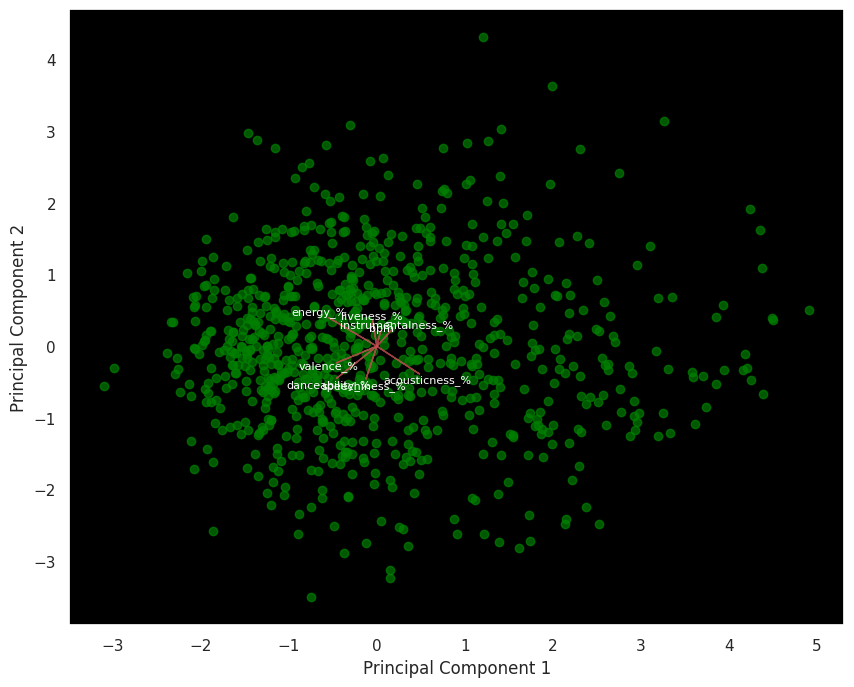

In [31]:
# Function to create biplot
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 8))

    # Scatter plot of data points (green)
    plt.scatter(score[:, 0], score[:, 1], alpha=0.7, color='green')

    # Arrows for feature loadings
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.8)
        if labels is not None:
            # Feature labels (white)
            plt.text(coeff[i, 0]*1.2, coeff[i, 1]*1.2, labels[i], color='white', ha='center', va='center', fontsize=8)

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid()
    plt.show()

# Create a biplot
biplot(X_pca, np.transpose(pca.components_), labels = selected_features)

**Elbow Method for Optimal K**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

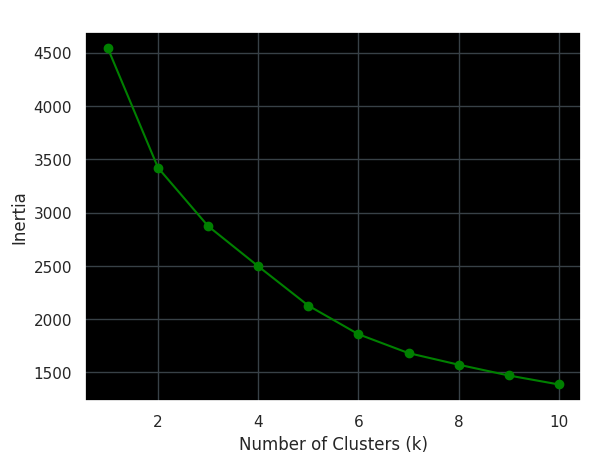

In [32]:
# Elbow Method for Optimal K
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Create the Elbow Method plot
plt.plot(range(1, 11), inertia, marker='o', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

From this plot its not possible to clearly tell the optimal number of K ie. number of clusters.

**silhouette score for optimal K**

In [33]:
silhouette_scores = []

for k in range(2, 11):  # Silhouette score is meaningful for k >= 2
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Find the optimal k based on the highest silhouette score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 to account for starting k from 2

print(f"The optimal number of clusters (k) is: {optimal_k}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

The optimal number of clusters (k) is: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [34]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2, random_state=42)

In [35]:
cluster_labels = kmeans.labels_
print("Cluster Labels:", cluster_labels)

Cluster Labels: [0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1
 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1
 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0
 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0
 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1
 1 0 0 0 

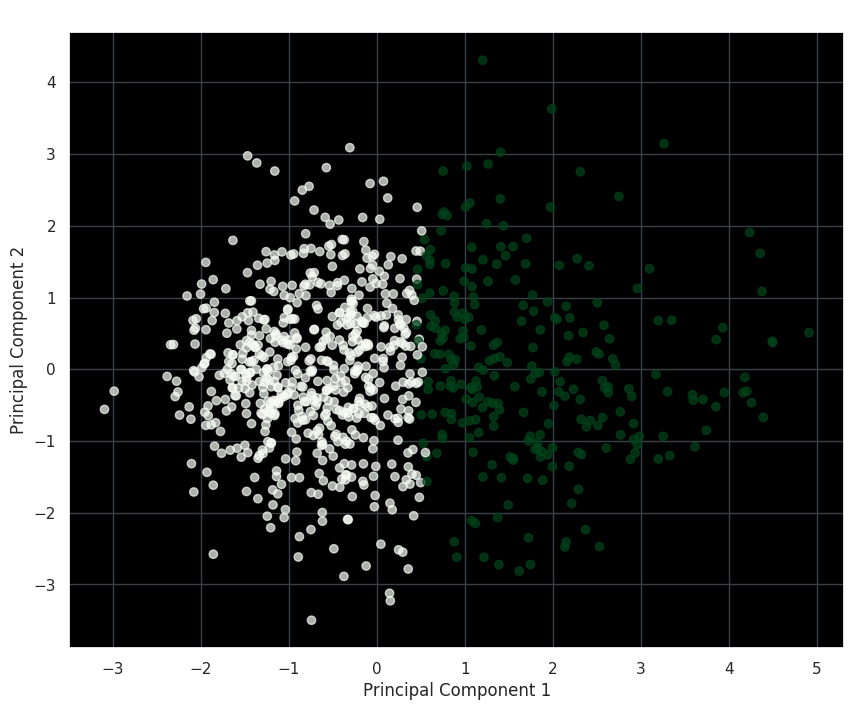

In [36]:
# Create a scatter plot with shades of green
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='Greens', alpha=0.7)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Visualization')

# Show the plot
plt.show()

**Evaluation**

In [37]:
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.29505114715506897


In [38]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 3420.8033310091632


In [39]:
calinski_score = calinski_harabasz_score(X_pca, cluster_labels)
print(f"Calinski-Harabasz Index: {calinski_score}")

Calinski-Harabasz Index: 279.88171218576963


In [40]:
davies_bouldin = davies_bouldin_score(X_pca, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")

Davies-Bouldin Index: 1.4895566289253175


**Silhouette Score: 0.2951:** The silhouette score is positive, indicating that the clusters are, on average, well-separated. A score around 0.3 suggests moderate separation, but there is room for improvement. Higher silhouette scores, closer to 1, are generally desirable.

**Inertia: 3420.80:** Inertia measures how compact the clusters are. The value of 3420.80 indicates the sum of squared distances of samples to their closest cluster center. Lower values of inertia are better, but the interpretation depends on the scale of your data.
Calinski-Harabasz Index: 279.88:

**Calinski-Harabasz index: 279.88** This is a ratio of between-cluster variance to within-cluster variance. A higher score indicates more well-defined clusters. The value of 279.88 suggests relatively good clustering, but it's always helpful to compare it with scores from other clustering attempts.

**Davies-Bouldin Index: 1.49**: The Davies-Bouldin index measures the average similarity between each cluster and its most similar cluster. A lower value indicates better clustering. The value of 1.49 suggests moderate separation between clusters.

**Overall Interpretation:**
The silhouette score and Calinski-Harabasz index suggest that the clustering has moderate to good separation between clusters.
The Davies-Bouldin index is relatively low, indicating that the clusters are reasonably well-separated, but it's not extremely low, suggesting there's room for improvement.
The inertia value provides insight into the compactness of the clusters, and a lower value would be preferable.

**K-means for 2 <= k <= 6**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

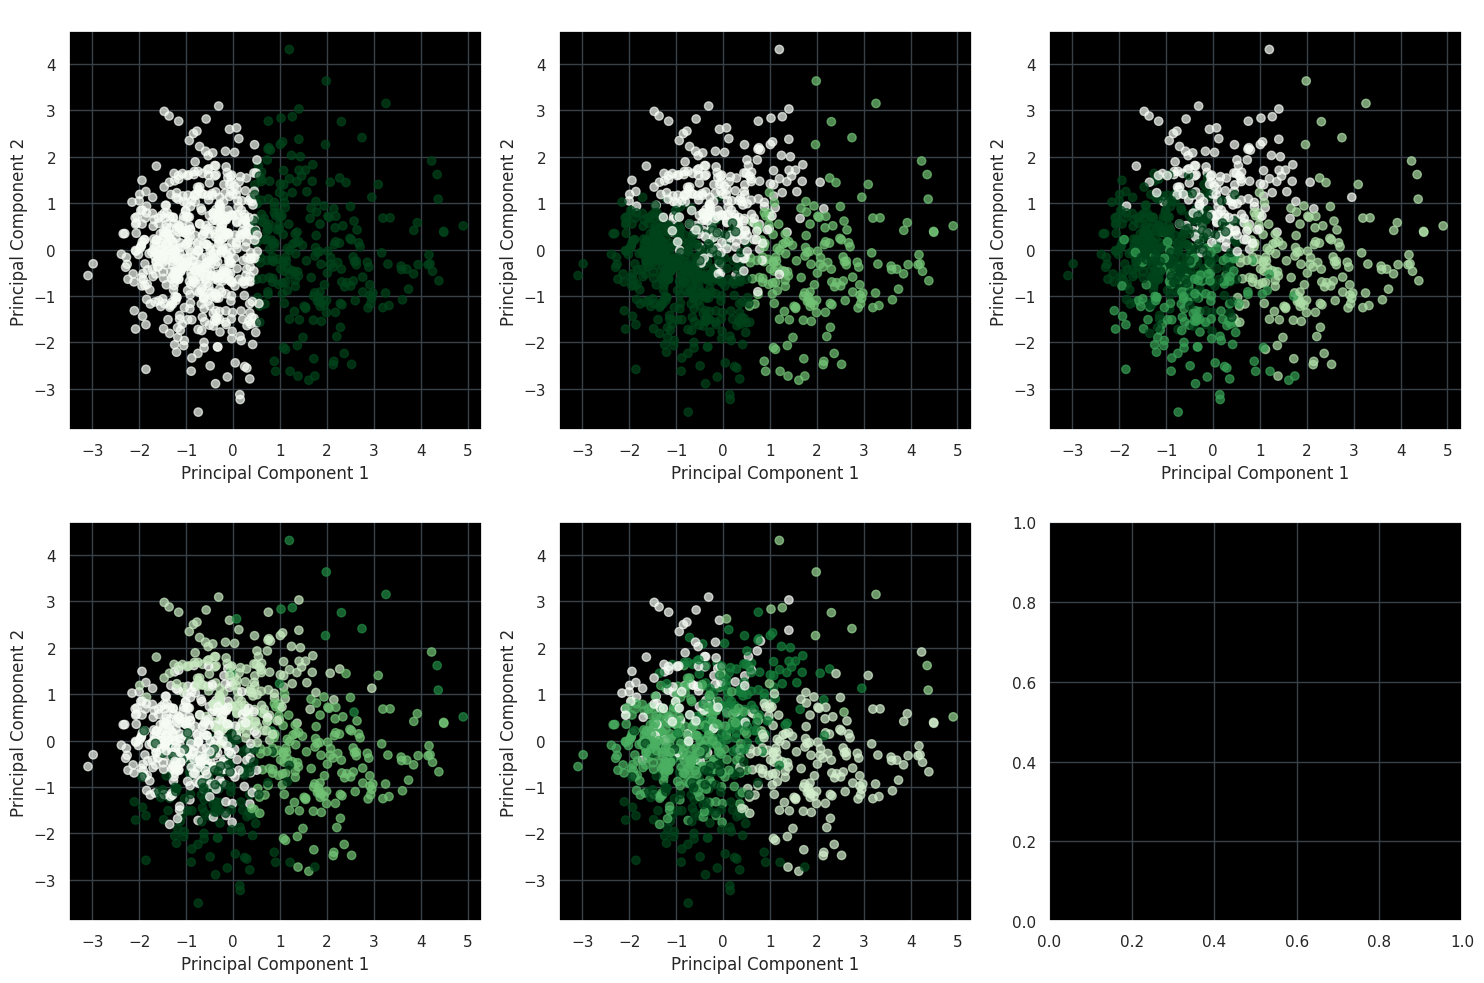

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




Metrics for k=2:
Silhouette Score: 0.29505114715506897
Inertia: 3420.8033310091632
Calinski-Harabasz Index: 279.88171218576963
Davies-Bouldin Index: 1.4895566289253175


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




Metrics for k=3:
Silhouette Score: 0.23733632425323037
Inertia: 2873.2447719098755
Calinski-Harabasz Index: 247.78875905535227
Davies-Bouldin Index: 1.525806192082581


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




Metrics for k=4:
Silhouette Score: 0.2441419555004903
Inertia: 2496.3207554447117
Calinski-Harabasz Index: 232.84459029730868
Davies-Bouldin Index: 1.3346159969855618


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




Metrics for k=5:
Silhouette Score: 0.2574819656477321
Inertia: 2127.27583574784
Calinski-Harabasz Index: 241.64077776062686
Davies-Bouldin Index: 1.1863306907038034


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




Metrics for k=6:
Silhouette Score: 0.26276659037439687
Inertia: 1858.5964169838498
Calinski-Harabasz Index: 245.6024553846908
Davies-Bouldin Index: 1.1150785353691683


In [41]:
# Range of k values
k_values = [2, 3, 4, 5, 6]

# Create a subplot grid for the plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the subplot grid for easier indexing
axs = axs.flatten()

# Iterate over different values of k
for i, k in enumerate(k_values, start=0):
    # Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)

    # Plot the clusters
    axs[i].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='Greens', alpha=0.7)

    # Add labels and title
    axs[i].set_title(f'K-Means Clustering (k={k})')
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel('Principal Component 2')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

# Evaluate clustering performance for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    inertia = kmeans.inertia_
    calinski_score = calinski_harabasz_score(X_pca, cluster_labels)
    davies_bouldin = davies_bouldin_score(X_pca, cluster_labels)

    print(f"\nMetrics for k={k}:")
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Inertia: {inertia}")
    print(f"Calinski-Harabasz Index: {calinski_score}")
    print(f"Davies-Bouldin Index: {davies_bouldin}")

In [ ]:
  # Evaluate clustering performance for each k
for k in k_values:



Metrics for k=2:
Silhouette Score: 0.2627665903745086
Inertia: 1858.5964169838458
Calinski-Harabasz Index: 245.60245538469096
Davies-Bouldin Index: 1.115078535369168

Metrics for k=3:
Silhouette Score: 0.2627665903745086
Inertia: 1858.5964169838458
Calinski-Harabasz Index: 245.60245538469096
Davies-Bouldin Index: 1.115078535369168

Metrics for k=4:
Silhouette Score: 0.2627665903745086
Inertia: 1858.5964169838458
Calinski-Harabasz Index: 245.60245538469096
Davies-Bouldin Index: 1.115078535369168

Metrics for k=5:
Silhouette Score: 0.2627665903745086
Inertia: 1858.5964169838458
Calinski-Harabasz Index: 245.60245538469096
Davies-Bouldin Index: 1.115078535369168

Metrics for k=6:
Silhouette Score: 0.2627665903745086
Inertia: 1858.5964169838458
Calinski-Harabasz Index: 245.60245538469096
Davies-Bouldin Index: 1.115078535369168


Silhouette Score:
The highest silhouette score is observed for k=2. Therefore, according to the silhouette score, the optimal number of clusters is 2.

Inertia:
Inertia decreases as k increases, but it's important to find a balance. The rate of decrease diminishes as k increases. There isn't a clear "optimal" k based on inertia alone. You might use the elbow method or an analysis of the rate of change in inertia to make a decision.

Calinski-Harabasz Index:
The Calinski-Harabasz index is highest for k=2, suggesting that two clusters may be optimal according to this metric.

Davies-Bouldin Index:
The Davies-Bouldin index is generally lower for higher values of k, suggesting that as the number of clusters increases, the compactness and separation of clusters improve. Therefore, based on this index, a higher value of k may be considered more optimal.

In summary:
Silhouette Score suggests k=2 is optimal.
Calinski-Harabasz Index suggests k=2 is optimal.
Davies-Bouldin Index suggests a higher value of k may be more optimal..

**Limitations of K-means:**

- Assumption of Circular Clusters: K-means assumes that clusters are spherical and equally sized, which might not be the case in real-world datasets where clusters can have complex shapes and varying sizes.


- Impact of Outliers: K-means is sensitive to outliers, and they can significantly influence the cluster centroids and distort the results.


- Equal Variance of Clusters: K-means assumes that clusters have roughly equal variance, which may not be true in all cases.

- Hard Assignment of Points: K-means performs a hard assignment of data points to clusters, meaning that each point belongs exclusively to one cluster, which may not represent the true nature of the data in some cases.

# **2.3    Heirarchical Clustering**

In [53]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster

In [54]:
# Perform hierarchical clustering on X_pca
linkage_matrix_pca = sch.linkage(X_pca, method='ward')

In [55]:
# Perform hierarchical clustering on X_scaled
linkage_matrix_scaled = sch.linkage(X_scaled, method='ward')

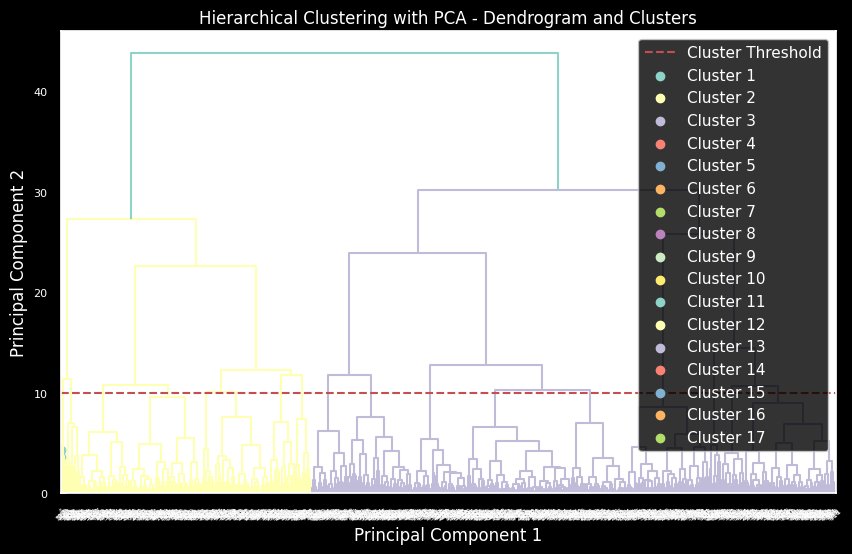

In [56]:
# Set the background color to dark
plt.style.use('dark_background')

# Create a figure for dendrogram
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the dendrogram
dendrogram = sch.dendrogram(linkage_matrix_pca)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Increase leaf font size
plt.yticks(fontsize=8)

# Add a horizontal line to visualize the number of clusters
threshold = 10  # Adjust this threshold based on the dendrogram structure
plt.axhline(y=threshold, color='r', linestyle='--', label='Cluster Threshold')

# Extract cluster assignments based on the threshold
clusters = fcluster(linkage_matrix_pca, threshold, criterion='distance')

# Visualize the clusters using different colors
for cluster_num in range(1, max(clusters) + 1):
    plt.scatter(X_pca[clusters == cluster_num, 0], X_pca[clusters == cluster_num, 1], label=f'Cluster {cluster_num}')

# Add labels and legend
plt.title('Hierarchical Clustering with PCA - Dendrogram and Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Show the dendrogram and cluster plot
plt.show()


In [71]:
import ipywidgets as widgets
from ipywidgets import interactive

# Function to update the plot and scores based on the threshold
def update_plot(threshold):
    # Extract cluster assignments based on the chosen threshold
    clusters = fcluster(linkage_matrix_pca, threshold, criterion='distance')

    # Create a scatter plot with different colors for each cluster
    plt.figure(figsize=(10, 6))
    for cluster_num in range(1, max(clusters) + 1):
        plt.scatter(X_pca[clusters == cluster_num, 0], X_pca[clusters == cluster_num, 1], label=f'Cluster {cluster_num}')

    # Add labels and legend
    plt.title('Hierarchical Clustering with PCA - Clusters Only')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()

    # Show the plot
    plt.show()

    # Evaluate clustering with silhouette score
    silhouette_avg = silhouette_score(X_pca, clusters)
    print(f"Silhouette Score: {silhouette_avg}")

    # Evaluate clustering with Davies-Bouldin index
    db_index = davies_bouldin_score(X_pca, clusters)
    print(f"Davies-Bouldin Index: {db_index}")

# Create an interactive slider
threshold_slider = widgets.FloatSlider(value=30, min=0, max=50, step=1, description='Threshold')

# Create an interactive widget
interactive_plot = interactive(update_plot, threshold=threshold_slider)

# Display the interactive widget
interactive_plot


interactive(children=(FloatSlider(value=30.0, description='Threshold', max=50.0, step=1.0), Output()), _dom_cl…

2 clusters:
- Silhouette Score: 0.23
- Davies-Bouldin Index: 1.65

3 clusters:
- Silhouette Score: 0.17
- Davies-Bouldin Index: 1.73

4 clusters:
- Silhouette Score: 0.19
- Davies-Bouldin Index: 1.52

In summary, based on these metrics, the 2-cluster solution seems to have a better balance of cluster separation and compactness compared to the 3- and 4-cluster solutions.

# **4. Findings**
Based on the analysis we see that for both clustering algorithms are able to create an optimal of 2 clusters using the audio features that we selected.
We can conclude the following:
- Consistency Across Algorithms: Both clustering algorithms consistently produce two clusters, it suggests that the data might inherently have a bimodal distribution or a clear separation into two groups. This consistency reinforces the reliability of the clustering result.
- Potential Genre Blending: The songs in this dataset may potentially belong to overlapping genres. Some songs might blend elements of multiple genres. This could explain the overlapping clusters and highlight the diversity within the dataset.
- Consideration of Similar Genres: Clustering suggests that songs with similar audio features belong to the same or closely related genres. It could indicate that certain genres share common acoustic characteristics, making them more challenging to differentiate based solely on the selected audio features.

**Potential Limitations and Caveats**
- Lack of Ground Truth Labels: The absence of genre labels makes it challenging to validate the clustering results. Without a ground truth for comparison, it's difficult to ascertain the accuracy and meaningfulness of the clusters.

- Genre Subjectivity: Genre classification in music is subjective and can vary among listeners. The lack of genre labels means that the clusters might not align with traditional genre boundaries, and the interpretation of clusters may be open to different perspectives.

- Data Bias from Spotify: The data extracted from Spotify may not be fully representative of all music genres or subgenres. Spotify's user base and catalog may have biases toward popular or mainstream genres, potentially leading to underrepresentation of niche or less popular genres.

- Limited Audio Features: The set of audio features selected for analysis might not capture all the nuances of a song's characteristics. There could be other relevant features. The audio features selected such as energy and dancability is similar in nature

- Limited Contextual Information: Audio features alone might not capture the full context of a song. Factors such as lyrics, cultural significance, or artist background could play a role in genre distinctions but are not considered in the analysis.